In [1]:
import pandas as pd
from sklearn import preprocessing

In [2]:
from seaborn import heatmap
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

palette = sns.color_palette("PiYG", as_cmap=True)
sns.set(rc={'text.usetex':False, 'font.family':'sans-serif','figure.facecolor':"white",'axes.facecolor':"white"})

In [3]:
idx  = 37 # index_can_be_processed_by_all_methods

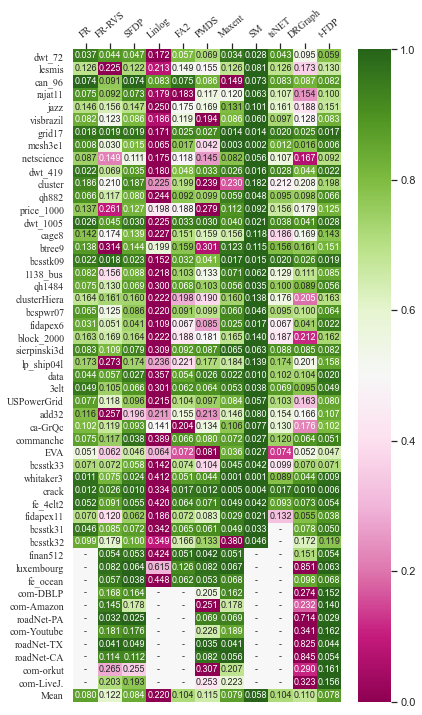

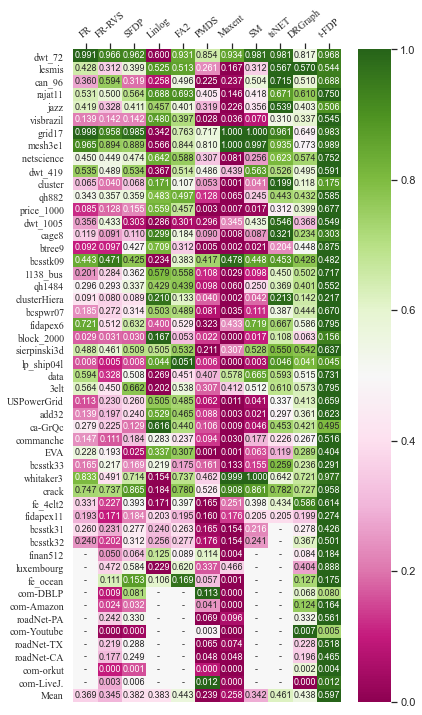

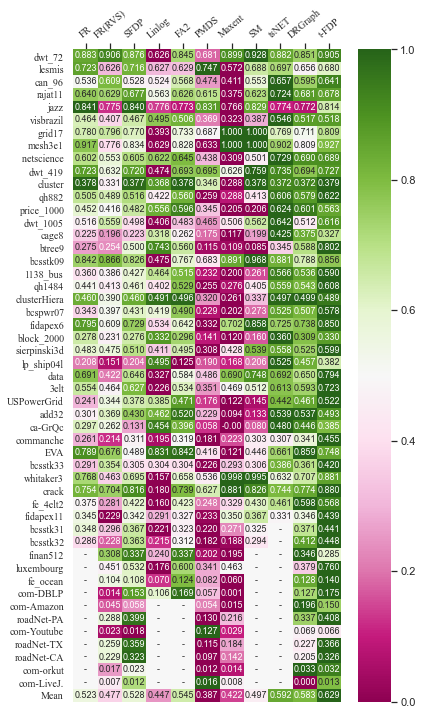

In [4]:
metrics = ["SE","NP1","NP2"]
for m in metrics:
    df = pd.read_csv("./results/" + m + "_All.csv",index_col=0)
#     df = df.rename(columns={"Exact":"Exact","BH":"BH","RVS":"RVS","FFTCPU":"ibFFT(CPU)","FFTGPU":"ibFFT(GPU)"})
#     df = df[:idx]
    
    df.loc["Mean"] = df[:idx].mean()
    cm = df.applymap(lambda x:x)
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    if m == "SE":
        maxminnorm_df = pd.DataFrame(min_max_scaler.fit_transform(1 - df.T).T, columns=df.columns, index=df.index)
    else:
        maxminnorm_df = pd.DataFrame(min_max_scaler.fit_transform(df.T).T, columns=df.columns, index=df.index)
    df_NA = df.applymap(lambda x: '-'  if not pd.notna(x) else '{:,.3f}'.format(x))
    plt.figure(figsize=(6,12))
    ax = heatmap(maxminnorm_df.fillna(0.5),annot=df_NA,fmt=".5s",cmap=palette,annot_kws={"size": 9})

    ax.xaxis.tick_top() 
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=40,fontsize=10,fontname="Times New Roman")
    plt.yticks(fontsize=10,fontname="Times New Roman")
    plt.savefig("./Figs/Fig11Heatmap/" + m + ".pdf")
    plt.show()